# Ford GoBike System 02/19: Data Exploration 
## by Jan W.

## Table of Contents

- [Preliminary Wrangling](#wrangle)
- [Univariate Exploration](#univariate)
- [Bivariate Exloration](#bivariate)
- [Multivariate Exploration](#multivariate)

<a id="wrangle"></a>
## Preliminary Wrangling

The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

In [877]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [878]:
# gather data from vsc file and store it in a dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assessing Data: Visually

In [879]:
df.head()
# duration of ride is in seconds
# start_time and end_time include date and time

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [880]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
6302,463,2019-02-28 10:34:44.4630,2019-02-28 10:42:28.2350,81.0,Berry St at 4th St,37.775880,-122.393170,61.0,Howard St at 8th St,37.776513,-122.411306,966,Customer,1982.0,Male,No
12059,246,2019-02-27 18:01:40.9120,2019-02-27 18:05:47.3440,60.0,8th St at Ringold St,37.774520,-122.409449,100.0,Bryant St at 15th St,37.767100,-122.410662,5911,Subscriber,1982.0,Male,No
139571,270,2019-02-07 20:53:34.5880,2019-02-07 20:58:05.0090,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,47.0,4th St at Harrison St,37.780955,-122.399749,1564,Subscriber,1989.0,Male,No
113098,1425,2019-02-12 12:55:48.0850,2019-02-12 13:19:33.4050,243.0,Bancroft Way at College Ave,37.869360,-122.254337,154.0,Doyle St at 59th St,37.841924,-122.288045,5513,Subscriber,1996.0,Male,Yes
102308,304,2019-02-14 16:43:00.0180,2019-02-14 16:48:04.1870,350.0,8th St at Brannan St,37.771431,-122.405787,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,6319,Subscriber,1978.0,Male,No
166536,542,2019-02-04 18:39:15.7210,2019-02-04 18:48:17.9760,356.0,Valencia St at Clinton Park,37.769188,-122.422285,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4739,Subscriber,1969.0,Male,No
70653,465,2019-02-19 18:06:44.0650,2019-02-19 18:14:29.9200,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5761,Subscriber,1971.0,Male,No
74216,819,2019-02-19 11:05:20.1420,2019-02-19 11:18:59.2910,84.0,Duboce Park,37.769200,-122.433812,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4738,Subscriber,1967.0,Male,No
135108,275,2019-02-08 15:39:16.3890,2019-02-08 15:43:51.4280,104.0,4th St at 16th St,37.767045,-122.390833,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5399,Subscriber,1986.0,Male,No
36975,1044,2019-02-23 14:51:36.4640,2019-02-23 15:09:01.1740,377.0,Fell St at Stanyan St,37.771917,-122.453704,109.0,17th St at Valencia St,37.763316,-122.421904,6229,Customer,1993.0,Male,No


### Assessing Data: Pragmatically

In [881]:
df.describe()
# duration_sec max is very high compared to mean
# member_birth_year min is very low compared to mean
# duration_sec max is very high compared to mean

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


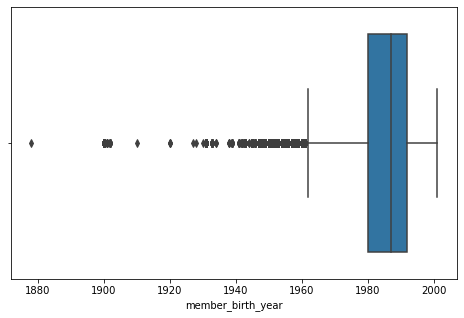

In [882]:
# create plot to visualize outliers for birth year
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='member_birth_year', color=base_color);

In [883]:
df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

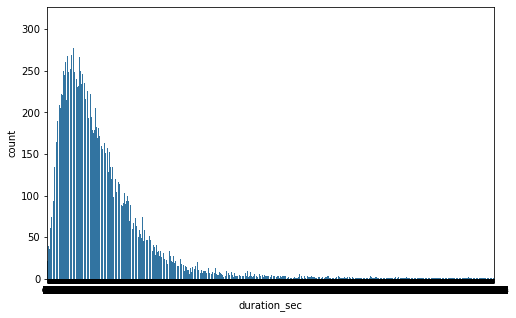

In [884]:
# plot minute_sec 
plt.figure(figsize = [8, 5])
sb.countplot(data=df, x='duration_sec', color=base_color);
# distribution for duration_sec has long tail

In [885]:
df.info()
# duration_sec is integer
# start_time and end_time are objects
# user_type is object
# member_gender is object
# member_birth_year is float
# bike_id is integer
# member_birth_year has nan entries
# member_gender has nan entries
# rows with unnecessary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [886]:
df.member_gender.value_counts()
# gender contains Other

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [887]:
sum(df.duplicated())
# no duplicated entries

0

#### Quality

- member_birth_year has nan entries
- member_gender has nan entries
- rows with unnecessary information
- member_gender contains 'Other'
- member_birth_year min is very low compared mean
- duration_sec is in seconds
- distribution for duration_sec has long tail
- duration_sec is integer
- start_time and end_time are objects
- member_birth_year is float
- user_type is object
- member_gender is object
- bike_id is integer

#### Tidiness

- start_time and end_time include date and time

### Cleaning Data

#### Missing Data

In [888]:
# create copy of  original dataframe
df_clean = df.copy()

##### member_gender contains 'Other'
##### member_gender has nan entries
##### member_birth_year has nan entries
##### member_birth_year is float
##### member_birth_year min is very low compared mean
##### rows with unnecessary information

###### Define

Drop entries with nan or 'Other'.
Calcuate age based on birth year, drop entries with age > 60 years and convert datatype to integer.
Drop columns with unnecessary information.

###### Code

In [889]:
# drop nan or 'other' entries
df_clean.drop(df_clean[df_clean['member_gender'].isnull() == True].index, inplace = True)
df_clean.drop(df_clean[df_clean['member_gender'] == "Other"].index, inplace = True)
df_clean.drop(df_clean[df_clean['member_birth_year'].isnull() == True].index, inplace = True)

# calculate age 
df_clean['member_age'] = 2021 - df_clean['member_birth_year']

# convert datatype for member_age to integer
df_clean['member_age'] = df_clean['member_age'].astype(int)

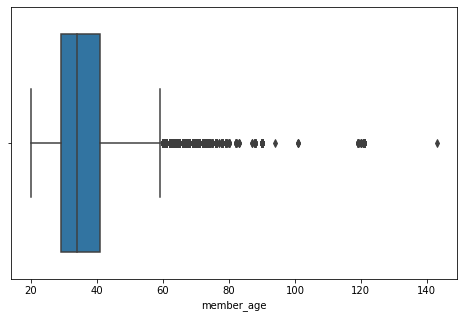

In [890]:
# create plot to visualize outliers for members age
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_clean, x='member_age', color=base_color);

In [891]:
# drop entries member age > 60
df_clean = df_clean.query('member_age <= 60')

In [892]:
# drop unnceessary columns with unnecessary information
df_clean = df_clean.drop(['start_station_id', 
                          'start_station_name', 
                          'start_station_latitude', 
                          'start_station_longitude',
                          'end_station_id',
                          'end_station_name',
                          'end_station_latitude',
                          'end_station_longitude',
                          'member_birth_year'], axis = 1)

###### Test

In [893]:
df_clean.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,4902,Customer,Male,No,37
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,5905,Customer,Male,No,49
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,4898,Subscriber,Male,Yes,47
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,3803,Subscriber,Female,No,38
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,6329,Subscriber,Male,No,32


In [894]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166598 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   duration_sec             166598 non-null  int64 
 1   start_time               166598 non-null  object
 2   end_time                 166598 non-null  object
 3   bike_id                  166598 non-null  int64 
 4   user_type                166598 non-null  object
 5   member_gender            166598 non-null  object
 6   bike_share_for_all_trip  166598 non-null  object
 7   member_age               166598 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.4+ MB


In [895]:
df_clean.member_gender.value_counts()

Male      126461
Female     40137
Name: member_gender, dtype: int64

#### Tidiness

##### start_time and end_time include date and time
##### start_time and end_time are objects

###### Define

Set datatype to datetime, create columns for start_date, end_date, start_day, start_hour, set datatypes and drop start_time and end_time.

###### Code

In [896]:
# set datatype to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# create columns
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['end_date'] = df_clean.end_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')

# set datatypes
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])
df_clean['start_hour'] = df_clean['start_hour'].astype(int)

# drop start_time and end_time
df_clean = df_clean.drop(['start_time', 'end_time'], axis = 1)

###### Test

In [897]:
df_clean.head()

,duration_sec,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_date,end_date,start_hour,start_day
0,52185,4902,Customer,Male,No,37,2019-02-28,2019-03-01,17,Thursday
2,61854,5905,Customer,Male,No,49,2019-02-28,2019-03-01,12,Thursday
4,1585,4898,Subscriber,Male,Yes,47,2019-02-28,2019-03-01,23,Thursday
6,1147,3803,Subscriber,Female,No,38,2019-02-28,2019-03-01,23,Thursday
7,1615,6329,Subscriber,Male,No,32,2019-02-28,2019-03-01,23,Thursday


In [898]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166598 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             166598 non-null  int64         
 1   bike_id                  166598 non-null  int64         
 2   user_type                166598 non-null  object        
 3   member_gender            166598 non-null  object        
 4   bike_share_for_all_trip  166598 non-null  object        
 5   member_age               166598 non-null  int64         
 6   start_date               166598 non-null  datetime64[ns]
 7   end_date                 166598 non-null  datetime64[ns]
 8   start_hour               166598 non-null  int64         
 9   start_day                166598 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 14.0+ MB


In [899]:
##### duration_sec is in seconds
##### distribution for duration_sec has long tail

###### Define

Change duration to minutes and drop duration_sec. Remove long tail for duration distribution.

###### Code

In [900]:
# change duration_sec to minute
df_clean['duration_minute'] = df_clean['duration_sec']/60

# drop duration_sec
df_clean = df_clean.drop(['duration_sec'], axis = 1)

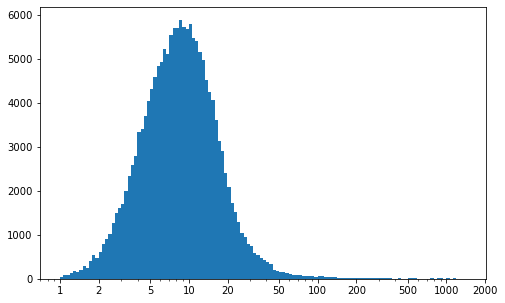

In [901]:
# duration_minute on log scale due to long tail
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minute', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
plt.show()

In [902]:
# drop trips longer than 70 minutes to remove long tail and get closer to normal distribution
df_clean = df_clean.query('duration_minute < 70')

###### Test

In [903]:
# check for duration_minute
df_clean.head()

,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_date,end_date,start_hour,start_day,duration_minute
4,4898,Subscriber,Male,Yes,47,2019-02-28,2019-03-01,23,Thursday,26.416667
6,3803,Subscriber,Female,No,38,2019-02-28,2019-03-01,23,Thursday,19.116667
7,6329,Subscriber,Male,No,32,2019-02-28,2019-03-01,23,Thursday,26.916667
9,6488,Subscriber,Male,No,29,2019-02-28,2019-03-01,23,Thursday,17.483333
10,5318,Subscriber,Female,Yes,25,2019-02-28,2019-03-01,23,Thursday,7.633333


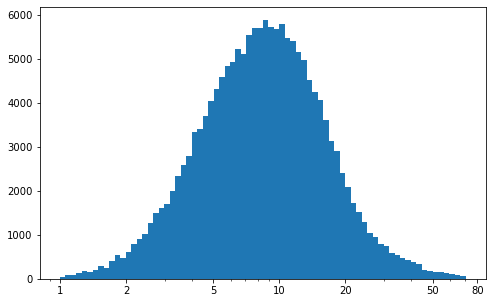

In [904]:
# trip distribution by duration on log scale after cleaning
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minute', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 80], [1, 2, 5, 10, 20, 50, 80])
plt.show()

##### duration_sec is integer (now: duration_minute)
##### user_type is object
##### member_gender is object
##### bike_id is integer

###### Define

Set datatypes by astype.

###### Code

In [905]:
# set datatypes
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

###### Test

In [906]:
df_clean.head()

,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_date,end_date,start_hour,start_day,duration_minute
4,4898,Subscriber,Male,Yes,47,2019-02-28,2019-03-01,23,Thursday,26.416667
6,3803,Subscriber,Female,No,38,2019-02-28,2019-03-01,23,Thursday,19.116667
7,6329,Subscriber,Male,No,32,2019-02-28,2019-03-01,23,Thursday,26.916667
9,6488,Subscriber,Male,No,29,2019-02-28,2019-03-01,23,Thursday,17.483333
10,5318,Subscriber,Female,Yes,25,2019-02-28,2019-03-01,23,Thursday,7.633333


In [907]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165558 entries, 4 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   bike_id                  165558 non-null  object        
 1   user_type                165558 non-null  category      
 2   member_gender            165558 non-null  category      
 3   bike_share_for_all_trip  165558 non-null  object        
 4   member_age               165558 non-null  int64         
 5   start_date               165558 non-null  datetime64[ns]
 6   end_date                 165558 non-null  datetime64[ns]
 7   start_hour               165558 non-null  int64         
 8   start_day                165558 non-null  object        
 9   duration_minute          165558 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 11.7+ MB


### Structure of dataset

The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. The original data contains 183412 entries and 16 columns with a variaty of information regarding durations, start and end times, start and end stations, bike ids, user types, members birth years, member genders and bike share options. After cleaning the dataset contains 166598 entries and 9 columns for further analysis:

Usage information:

- start_date: start date of trip
- end_date: end date of trip
- start_hour: start hour of trip
- start_day: start day of trip
- duration_minute: duration of trip in minutes

Member information:

- bike_id: id of bike
- user_type: customer or subscriber
- member_gender: male or female
- member_age: the age of the members in years
- bike_share_for_all_trip: members enrolled in the bike share for all program for low-income residents


### Main feature of interest 

The main feature of interest lies in analyzing the riding behavior of members and customers. Do the two target groups make different use of the service and, if so, for what reasons?

### Features in the dataset that will help to support investigation into  feature of interest

The usage information will help identify possible patterns of behavior. The member information will provide further insight into how to interpret these patterns for the two target groups.

<a id="univariate"></a>
## Univariate Exploration

Investigating distributions of individual variables to identify possible patterns of behavior.

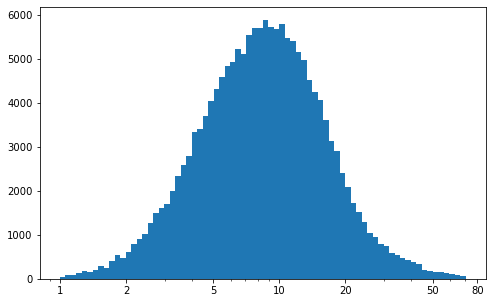

In [908]:
# trip distribution by duration
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minute', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 80], [1, 2, 5, 10, 20, 50, 80])
plt.show()

Trips are usually rather short. On average, they last 10 minutes. Most trips are between 4 to 20 minutes.

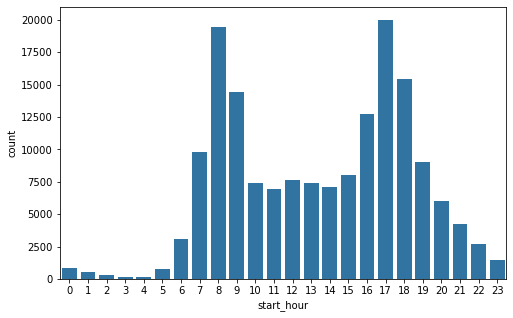

In [909]:
# trip distribution by hours
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_hour', color=base_color);

Between 7-9am and 4-6pm, most trips are made.

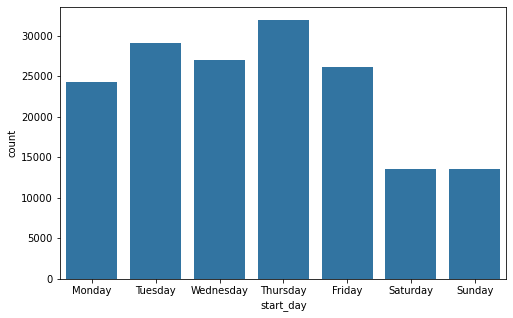

In [910]:
# convert start_day into ordered categorical type
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_type = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day'] = df_clean['start_day'].astype(weekday_type)

# trip distribution by day
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_day', color=base_color);

More trips occur during the week than on weekends.

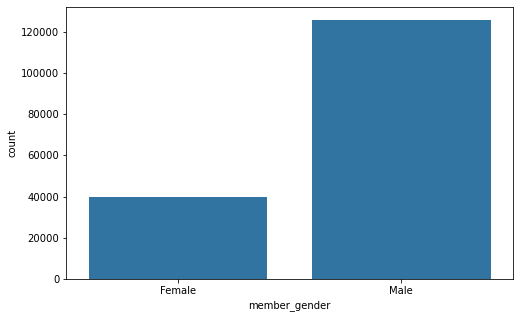

In [911]:
# trip distribution by gender
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='member_gender', color=base_color);

Trips are made significantly more often by men.

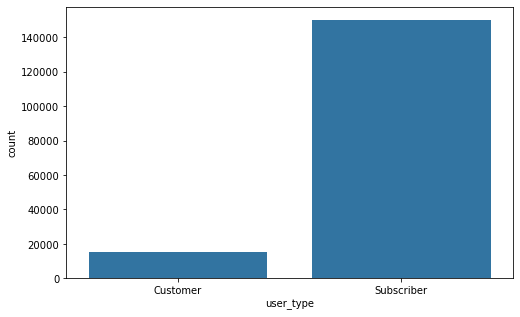

In [912]:
# trip distribution by user type
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='user_type', color=base_color);

Rides are almost predominantly provided by subscribers.

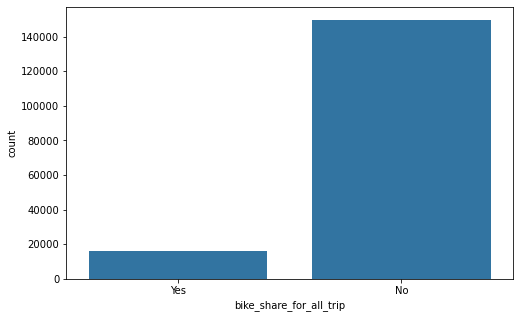

In [913]:
# trip distribution by enrollment
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color);

Most drivers pay for the service themselves. 

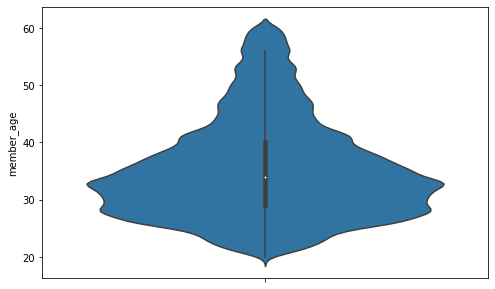

In [914]:
# distribution of age
plt.figure(figsize = [8, 5])
sb.violinplot(data = df_clean, y = 'member_age');

Riders are generally between 30-40 years old. Old riders are clearly in the minority.

### Discussion of distribution of variable of interest

- Trips are usually rather short. On average, they last 10 minutes. Most trips are between 4 to 20 minutes.
- Between 7-9am and 4-6pm, most trips are made.
- More trips occur during the week than on weekends.
- Trips are made significantly more often by men.
- Rides are almost predominantly provided by subscribers.
- Most drivers pay for the service themselves. 
- Riders are generally between 30-40 years old. Old riders are clearly in the minority. 

The data suggest that the service is predominantly paid by young and middle-aged men and regularly used for shorter trips during the week at the beginning and end of work hours. The service appears to be used less as a casual activity and more as a way to commute to work each day in february. This will be examined in more detail in the next step.

### Performed operations on the data to tidy, adjust, or change the form of the data

Because of the data wrangling process, there wasn't much need to clean or change the data. I only convert start_day to an ordered categorical type to show the days of the week in the correct order.

<a id="bivariate"></a>
## Bivariate Exploration

Investigate relationships between pairs of variables to interpret these patterns.

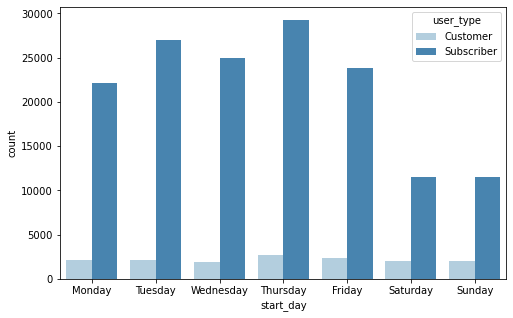

In [915]:
# trip distribution by weekday for subscriber and customer
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_day', hue='user_type', palette = 'Blues');

Trips by subscribers decrease by almost half on weekends. Trips by customers remain almost constant over the weekdays.

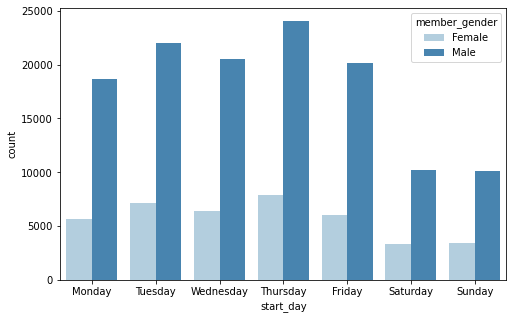

In [916]:
# trip distribution by weekday for gender
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_day', hue='member_gender', palette = 'Blues');

Even though more men use the service, there is little difference in behavior between women and men across days of the week.

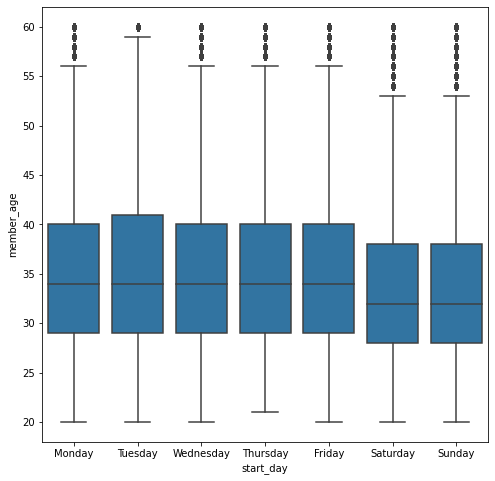

In [917]:
# trip distribution by weekday for age
plt.figure(figsize = [8, 8])
sb.boxplot(data=df_clean, x='start_day', y='member_age', color=base_color);

During the week, the age remains constant between 30 and 40. Interestingly, the age of users decreases on weekends. However, there is a larger number of outliers with higher age on weekends.

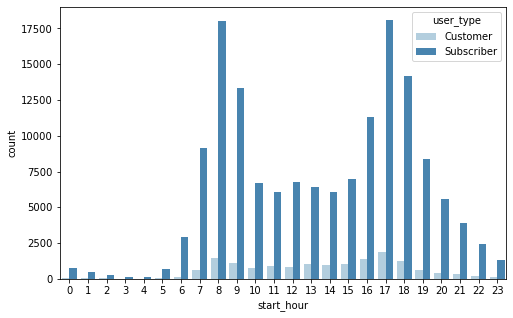

In [918]:
# trip distribution by hours for subscribers and customer
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_hour', hue='user_type', palette = 'Blues');

Both subscriber and customer use the service most heavily between 7-9am and 4-7pm.

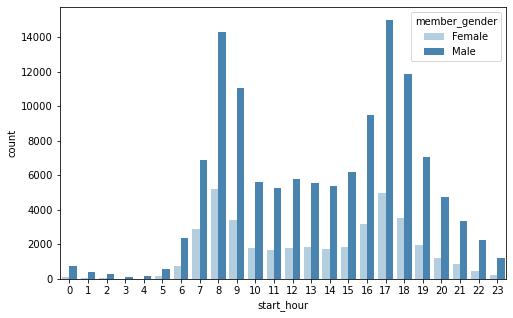

In [919]:
# trip distribution by hours for gender
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='start_hour', hue='member_gender', palette = 'Blues');

Both women and men use the service most heavily between 7-9am and 4-6pm.

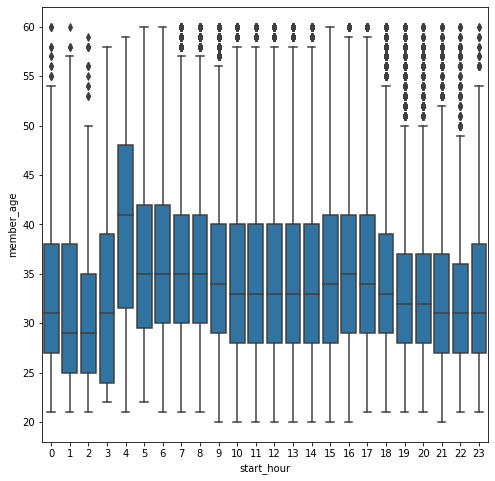

In [920]:
# trip distribution by hours for age
plt.figure(figsize = [8, 8])
sb.boxplot(data=df_clean, x='start_hour', y='member_age', color=base_color);

Before, after, and between 7-9am and 4-6pm, users tend to get younger. But especially from 6-12pm there are many outliers.

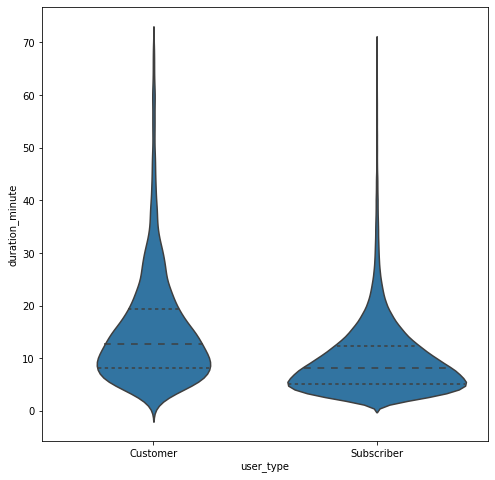

In [921]:
# trip duration for subscriber and customer
plt.figure(figsize = [8, 8])
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color=base_color, inner='quartile');

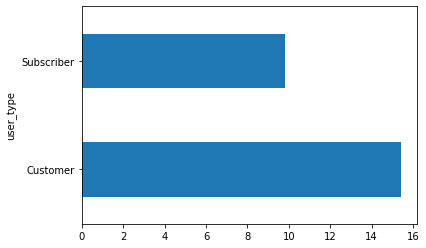

In [922]:
# average trip duration for subscriber and customer
df_clean.groupby('user_type')['duration_minute'].mean().plot(kind = 'barh', color = base_color);

Subscribers take shorter trips more frequently than customers. Customers, on the other hand, sometimes make fewer but longer trips. However, on average, trip times between participants and customers do not differ much, but around 5 minutes.

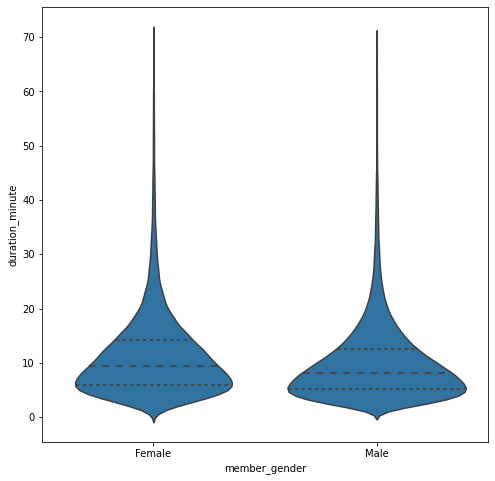

In [923]:
# trip duration by gender
plt.figure(figsize = [8, 8])
sb.violinplot(data=df_clean, x='member_gender', y='duration_minute', color=base_color, inner='quartile');

Regarding trip duration there are hardly any differences in behavior between women and men.

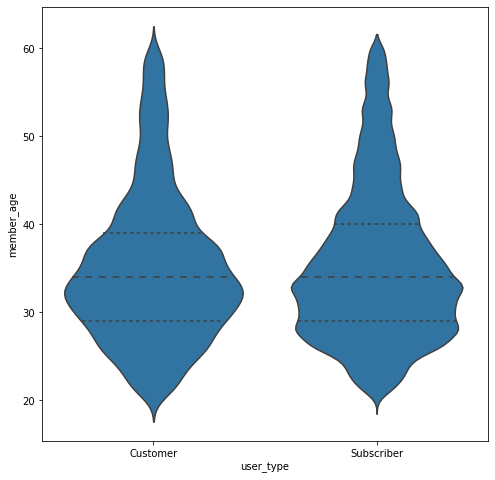

In [924]:
# age distribution for subscriber and customer
plt.figure(figsize = [8, 8])
sb.violinplot(data=df_clean, x='user_type', y='member_age', color=base_color, inner='quartile');

Regarding age distribution there are hardly any differences in behavior between subscriber and customer.

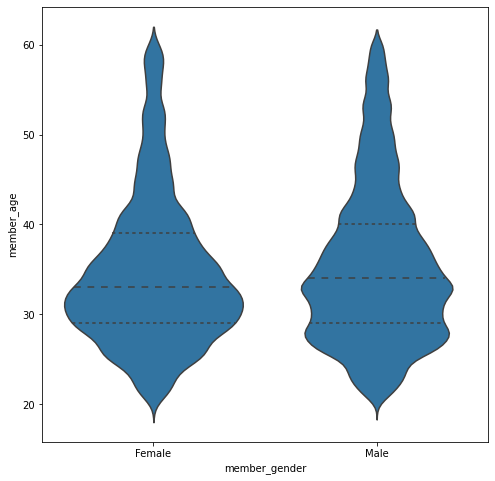

In [925]:
# age distribution by gender
plt.figure(figsize = [8, 8])
sb.violinplot(data=df_clean, x='member_gender', y='member_age', color=base_color, inner='quartile');

Regarding age distribution there are hardly any differences in behavior between women and men.

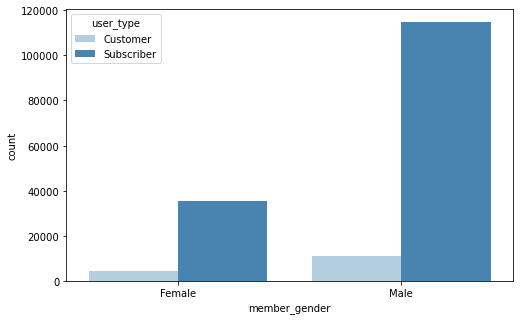

In [926]:
# trip distribution by gender for subscriber and customer
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='member_gender', hue='user_type', palette = 'Blues');

There are significantly more men among both subscribers and customers.

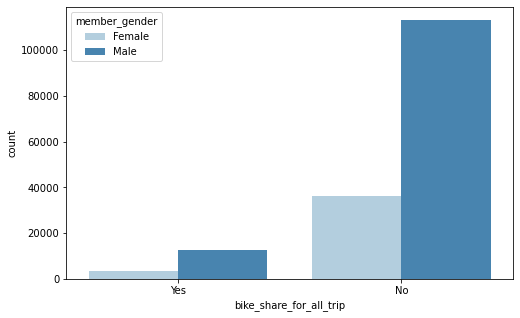

In [927]:
# trip distribution by enrollment for gender
plt.figure(figsize = [8, 5])
sb.countplot(data=df_clean, x='bike_share_for_all_trip', hue='member_gender', palette = 'Blues');

There are significantly more men among bike share enrollments.

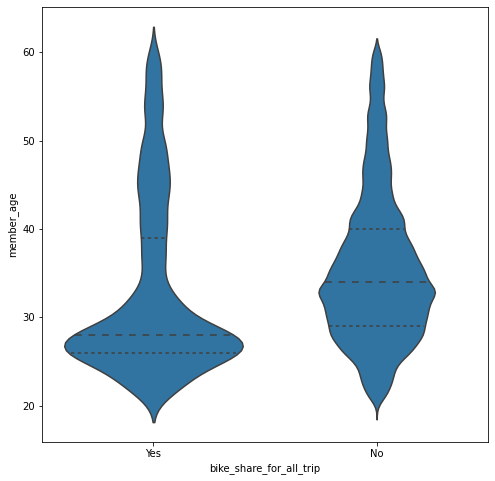

In [928]:
plt.figure(figsize = [8, 8])
sb.violinplot(data=df_clean, x='bike_share_for_all_trip', y='member_age', color=base_color, inner='quartile');

Users of the bike share service are on average under 30 years old.

### How feature of interest vary with other features in the dataset

- Trips by subscribers decrease by almost half on weekends. 
- Trips by customers remain almost constant over the weekdays.
- Both subscriber and customer use the service most heavily between 7-9am and 4-7pm.
- Subscribers take shorter trips more frequently than customers. Customers, on the other hand, sometimes make fewer but longer trips. However, on average, trip times between participants and customers do not differ much, but around 5 minutes.
- Regarding age distribution there are hardly any differences in behavior between subscriber and customer.
- There are significantly more men among both subscribers and customers.

Interestingly, the user behavior of subscribers and customers is very similar in terms of usage times, trip length, and age distribution. Customers also seem to use the service primarily for commuting to work in feburary. However, the use of the service by customers does not decrease as much on weekends as it does among subscribers. Customers also take longer trips. The next step is to investigate the behavior of subscribers customers during the weekdays in more detail.


### Observation of interesting relationships between the other features

- Even though more men use the service, there is little difference in behavior between women and men across days of the week.
- Both women and men use the service most heavily between 7-9am and 4-6pm.
- Regarding trip duration there are hardly any differences in behavior between women and men.
- Regarding age distribution there are hardly any differences in behavior between women and men.
- There are significantly more men among bike share enrollments.
- During the week, the age remains constant between 30 and 40. Interestingly, the age of users decreases on weekends. However, there is a larger number of outliers with higher age on weekends.
- Before, after, and between 7-9am and 4-6pm, users tend to get younger. But especially from 6-12pm there are many outliers.
- Users of the bike share service are on average under 30 years old.

Although more men use the service, there is little difference in the usage behavior of women and men. Women also seem to use the service primarily for their daily commute to work. Interestingly, age decreases on average at the weekend. However, there are also a large number of upward outliers here.

<a id="multivariate"></a>
## Multivariate Exploration

Create plots of three or more variables to investigate data even further. 

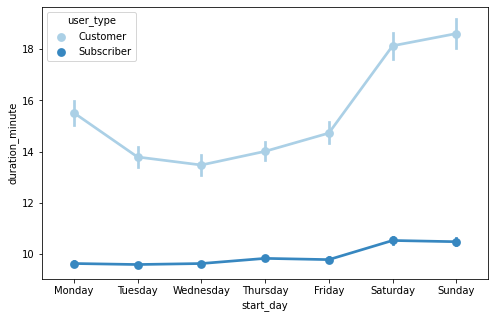

In [929]:
# distribution of trip duration for customers and subscribers during weekdays
plt.figure(figsize = [8, 5])
sb.pointplot(data = df_clean, x = 'start_day', y = 'duration_minute', hue = 'user_type', palette = 'Blues');

For both subscribers and customers, trip length increases at the weekend. However, the increase is significantly greater for customers than for subscribers.

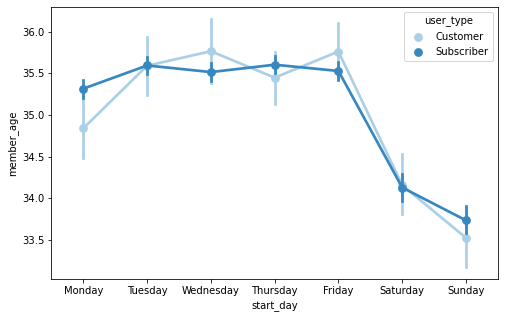

In [930]:
# distribution of member age for customers and subscribers during weekdays
plt.figure(figsize = [8, 5])
sb.pointplot(data = df_clean, x = 'start_day', y = 'member_age', hue = 'user_type', palette = 'Blues');

Interestingly, the average age of subscribers and customers drops almost identically at the weekend.

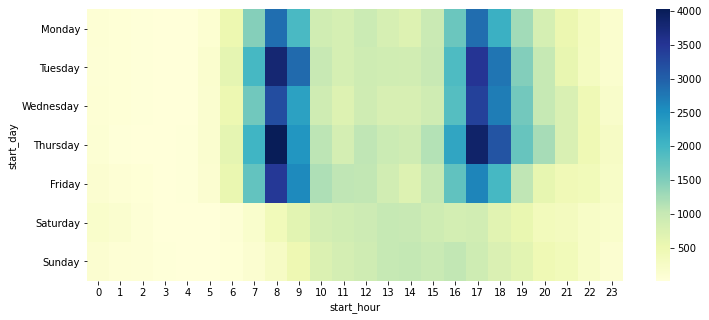

In [931]:
# distribution of usage by weekday and hour for subscriber
plt.figure(figsize = [12, 5])
subs = df_clean.query('user_type == "Subscriber"').groupby(['start_day', 'start_hour']).size().reset_index(name='counts');
subs = subs.pivot('start_day', 'start_hour', 'counts')
sb.heatmap(subs, cmap = 'YlGnBu');

Even though the duration of trips on weekends is increasing, subscribers predominantly use the service during the week to travel to work.

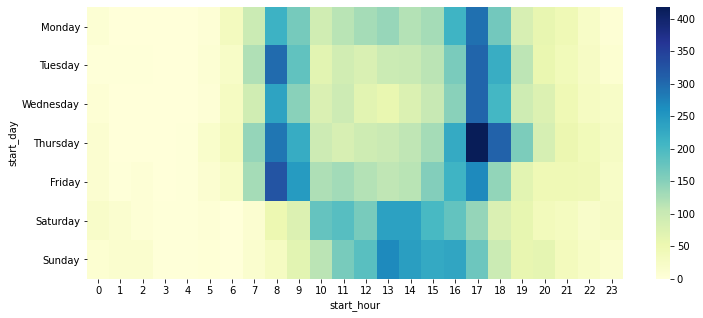

In [932]:
# distribution of usage by weekday and hours for customer
plt.figure(figsize = [12, 5])
customers = df_clean.query('user_type == "Customer"').groupby(['start_day', 'start_hour']).size().reset_index(name='counts');
customers = customers.pivot('start_day', 'start_hour', 'counts')
sb.heatmap(customers, cmap = 'YlGnBu');

Customers use the service not only during the week to go to work, but also from morning to evening on weekends.

### Features that strengthened each other in terms of looking at feature of interest

- For both subscribers and customers, trip length increases at the weekend. However, the increase is significantly greater for customers than for subscribers.
- Interestingly, the average age of subscribers and customers drops almost identically at the weekend.
- Even though the duration of trips on weekends is increasing, subscribers predominantly use the service during the week to travel to work.
- Customers use the service not only during the week to go to work, but also from morning to evening on weekends.

Customers and subscribers seem to use the service for the same purpose during the week: commuting to work. At the weekend, however, the usage behavior of the two target groups differs. While usage by subscribers is declining, younger customers in particular use the service at the weekend for medium distances during the day.

In [933]:
# store df_clean in a seperate dataframe
df_clean.to_csv('201902-fordgobike-tripdata_clean.csv', index=False)